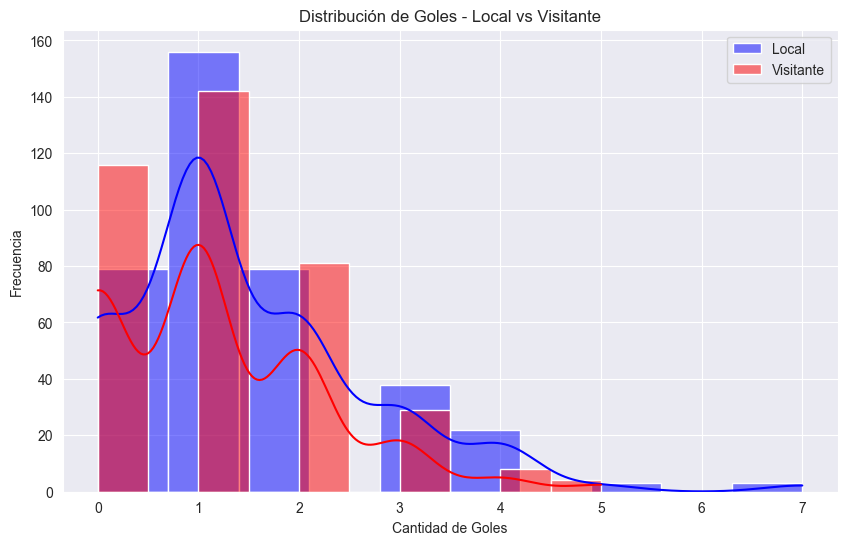

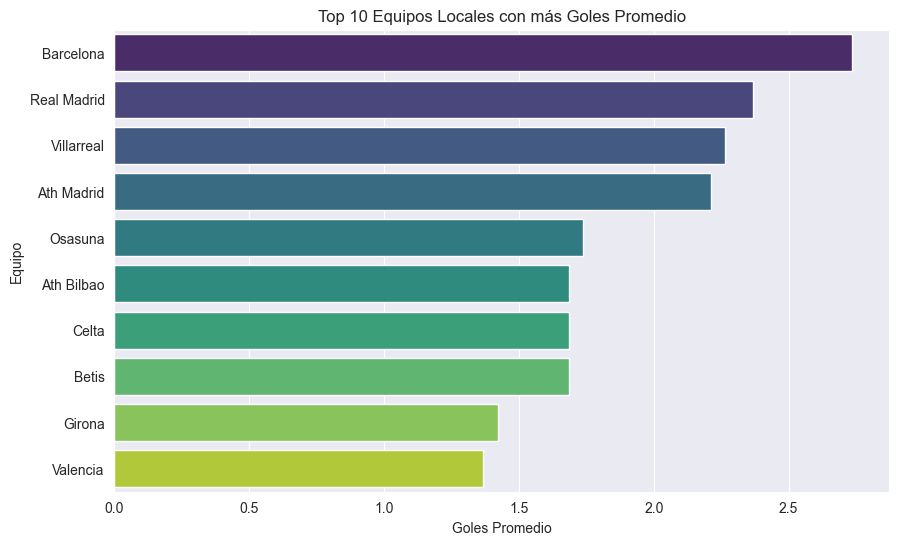

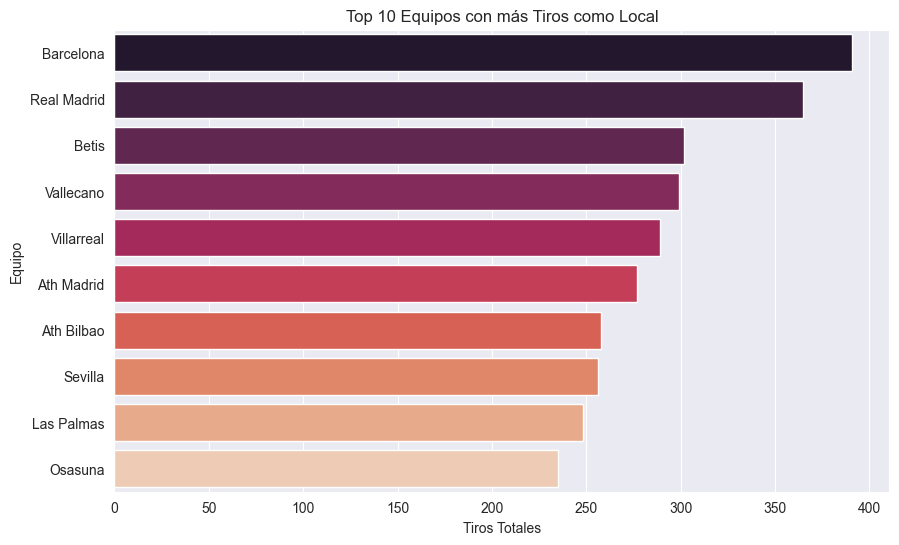

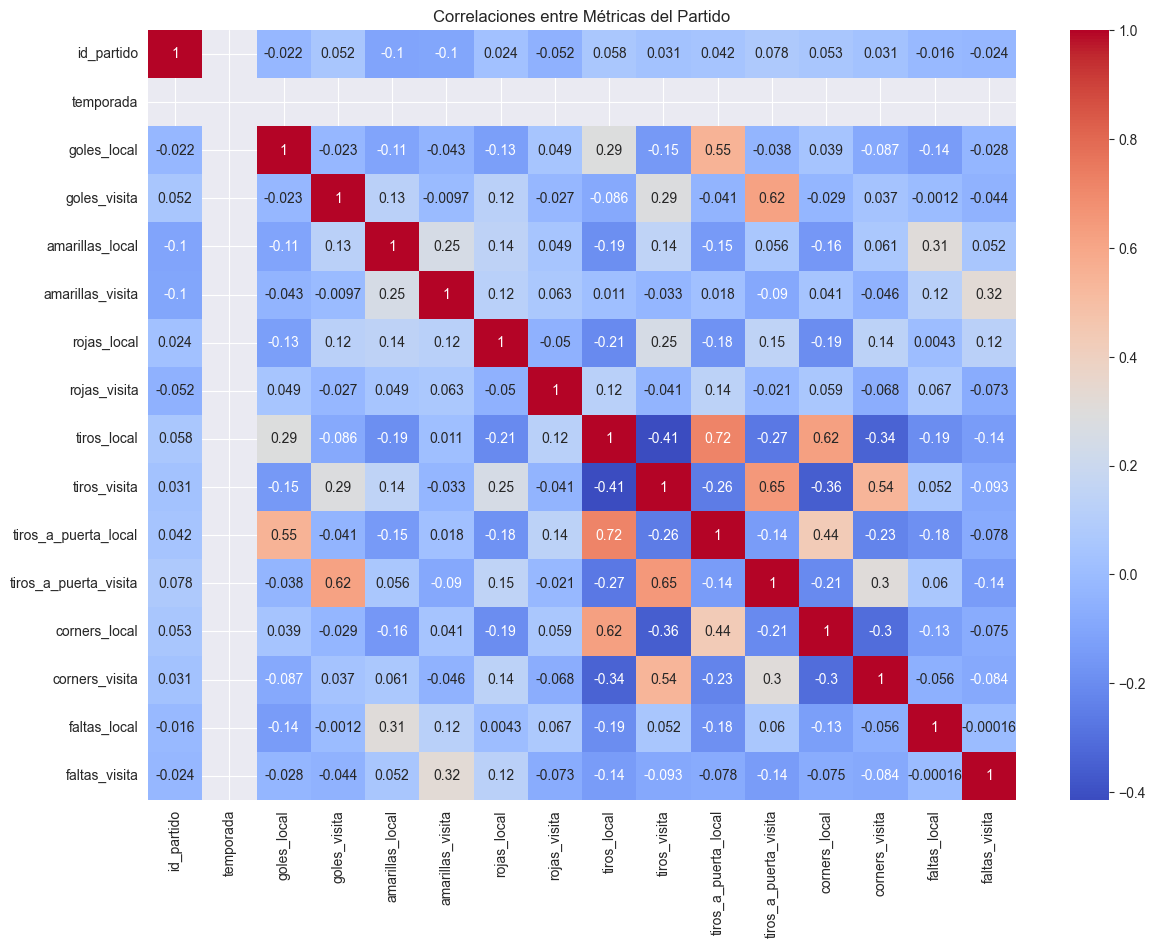

In [3]:
##Vizualizaciones especificas
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

###Cargar datos desde el BD
conn = sqlite3.connect("../data/raw/laliga.db")
df = pd.read_sql_query("SELECT * FROM partidos", conn)
conn.close()

# Verificamos y mostramos las primeras lineas
df.head()

# Calcular el promedio de goles como local por equipo
promedios = df.groupby('equipo_local')['goles_local'].mean().sort_values(ascending=False).head(10)

###Graficos
##Histograma de goles local vs visitante
plt.figure(figsize=(10,6))
sns.histplot(df['goles_local'], bins=10, color='blue', label='Local', kde=True)
sns.histplot(df['goles_visita'], bins=10, color='red', label='Visitante', kde=True)
plt.title("Distribución de Goles - Local vs Visitante")
plt.xlabel("Cantidad de Goles")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()



##top 10 goles de los equipos locales
# Calcular el promedio de goles como local por equipo
promedios = df.groupby('equipo_local')['goles_local'].mean().sort_values(ascending=False).head(10)

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=promedios.values, y=promedios.index, hue=promedios.index, palette="viridis", legend=False)
plt.title("Top 10 Equipos Locales con más Goles Promedio")
plt.xlabel("Goles Promedio")
plt.ylabel("Equipo")
plt.show()



##Total de tiros por equipo
# Calcular total de tiros por equipo local
tiros_equipo = df.groupby('equipo_local')['tiros_local'].sum().sort_values(ascending=False).head(10)

# Gráfico de tiros
plt.figure(figsize=(10,6))
sns.barplot(x=tiros_equipo.values, y=tiros_equipo.index, hue=tiros_equipo.index, palette="rocket", legend=False)
plt.title("Top 10 Equipos con más Tiros como Local")
plt.xlabel("Tiros Totales")
plt.ylabel("Equipo")
plt.show()


##Correlacion de Heatmap
# Correlación entre variables numéricas
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlaciones entre Métricas del Partido")
plt.show()

